In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Canada') 
race = ff1.get_session(2023, 'Canada', 'R')
race.load()
race_laps = race.laps

In [ ]:
driver1 = "VER"
driver2 = "PER"
race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
race_laps = race_laps.loc[((race_laps['Driver'] == driver1)  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == driver2)  & (race_laps['IsAccurate']==True)) ] 
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)

race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 1]
race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 11]
race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 42]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 42]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 43]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 43]

In [9]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}

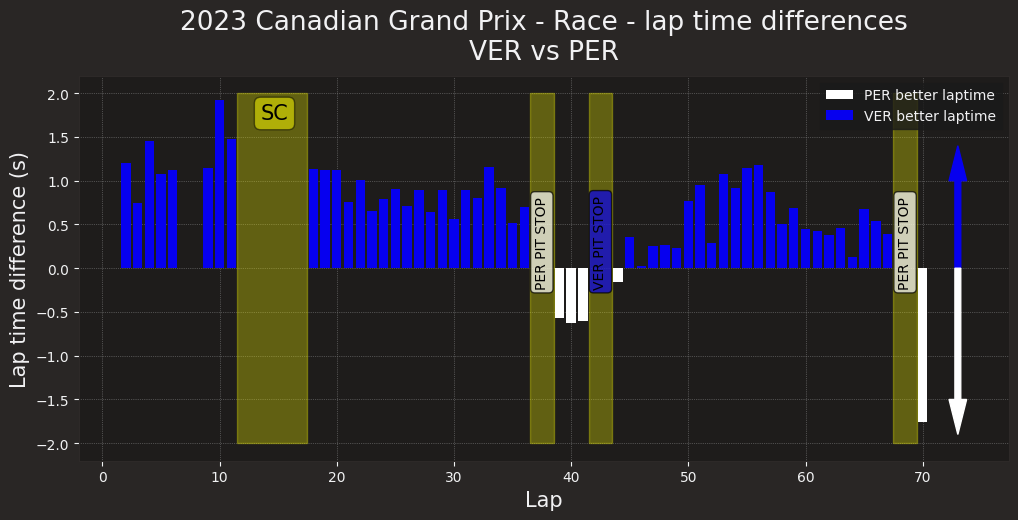

In [46]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0)
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
ax = plt.gca()
'''


ax.add_patch(Rectangle((40.5, -2), 2, 3.5, color='yellow'))
ax.add_patch(Rectangle((51.5, -2), 2, 3.5, color='yellow'))


ax.text(41, -0.5, "LEC Pit Stop", color=ff1.plotting.team_color("Ferrari"), rotation=90)
ax.text(26, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90)
ax.text(52, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90)'''

ax.add_patch(Rectangle((11.5, -2), 6, 4, color='yellow', alpha=0.3))
ax.text(13.5, 1.70, "SC", color="black", bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5, edgecolor="black"), fontsize=15)

ax.add_patch(Rectangle((36.5, -2), 2, 4, color='yellow', alpha=0.3))
ax.text(36.9, -0.2, "PER PIT STOP", color="black", bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor="black"), fontsize=10, rotation=90)

ax.add_patch(Rectangle((41.5, -2), 2, 4, color='yellow', alpha=0.3))
ax.text(41.9, -0.2, "VER PIT STOP", color="black", bbox=dict(boxstyle='round', facecolor=ff1.plotting.team_color("Red Bull"), alpha=0.7, edgecolor="black"), fontsize=10, rotation=90)

ax.add_patch(Rectangle((67.5, -2), 2, 4, color='yellow', alpha=0.3))
ax.text(67.9, -0.2, "PER PIT STOP", color="black", bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor="black"), fontsize=10, rotation=90)

plt.arrow(73, 0, 0, 1, width=0.5, head_length=0.4, color=ff1.plotting.team_color("Red Bull"))
plt.arrow(73, 0, 0, -1.5, width=0.5, head_length=0.4, color="white")
plt.bar(list(mask1.keys()), list(mask1.values()), color = "white", width=0.8, label = "PER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label = "VER better laptime")
plt.legend()